In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [5]:
df=pd.read_csv('Salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.shape

(30, 2)

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
target=df[['Salary']]
target

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [9]:
features=df.drop('Salary',axis=1)
features

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [10]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22, 1)
(22, 1)
(8, 1)
(8, 1)


In [12]:
lin_model=LinearRegression()

In [13]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred=lin_model.predict(x_test)
y_pred

array([[ 61553.5935156 ],
       [117565.50786941],
       [125291.28915959],
       [ 65416.48416069],
       [ 53827.81222542],
       [ 64450.76149941],
       [118531.23053068],
       [112736.89456304]])

In [15]:
y_test

,Salary
9,57189.0
26,116969.0
28,122391.0
13,57081.0
5,56642.0
12,56957.0
27,112635.0
25,105582.0


In [16]:
erro=y_test-y_pred
erro

,Salary
9,-4364.593516
26,-596.507869
28,-2900.289160
13,-8335.484161
5,2814.187775
12,-7493.761499
27,-5896.230531
25,-7154.894563


In [17]:
B1=lin_model.coef_
B1

array([[9657.22661273]])

In [18]:
B0=lin_model.intercept_
B0

array([25821.85504851])

In [19]:
lin_model.score(x_test,y_test)

0.9633431610802272

### Linear Regression Plot

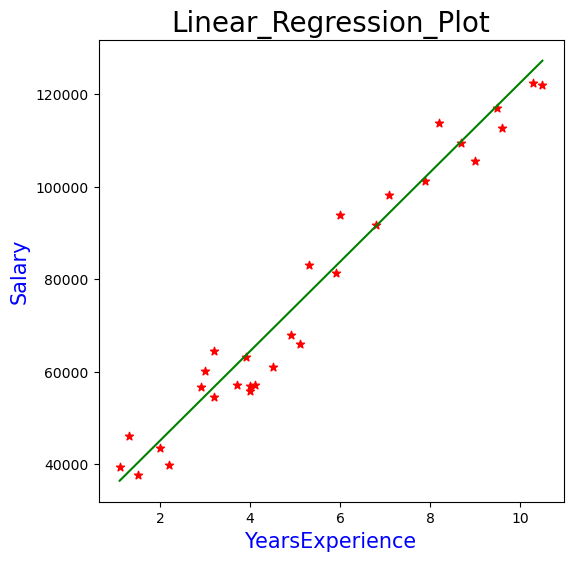

In [20]:
plt.figure(figsize=(6,6))
plt.title('Linear_Regression_Plot',size=20,color='black')
plt.scatter(df.YearsExperience,df.Salary,color='red',marker='*')
plt.xlabel('YearsExperience',size=15,color='blue')
plt.ylabel('Salary',size=15,color='blue')
plt.plot(df.YearsExperience,lin_model.predict(df[['YearsExperience']]),color='green')


In [36]:
linear_model1= smf.ols('Salary~YearsExperience', data = df).fit()

In [37]:
print('R-squared     :',linear_model1.rsquared.round(3))
print('Adj.R-squared :',linear_model1.rsquared_adj.round(3))
print('AIC Value     :',linear_model1.aic.round(3))
print('BIC Value     :',linear_model1.bic.round(3))

R-squared     : 0.957
Adj.R-squared : 0.955
AIC Value     : 606.882
BIC Value     : 609.685


In [38]:
linear_model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [39]:
linear_model2= smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()

In [40]:
print('R-squared     :',linear_model2.rsquared.round(3))
print('Adj.R-squared :',linear_model2.rsquared_adj.round(3))
print('AIC Value     :',linear_model2.aic.round(3))
print('BIC Value     :',linear_model2.bic.round(3))

R-squared     : 0.932
Adj.R-squared : 0.93
AIC Value     : 105.179
BIC Value     : 107.981


In [41]:
linear_model2.params

Intercept                   16.660277
np.cbrt(YearsExperience)    14.896252
dtype: float64

In [42]:
linear_model3= smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()

In [43]:
print('R-squared     :',linear_model3.rsquared.round(3))
print('Adj.R-squared :',linear_model3.rsquared_adj.round(3))
print('AIC Value     :',linear_model3.aic.round(3))
print('BIC Value     :',linear_model3.bic.round(3))

R-squared     : 0.942
Adj.R-squared : 0.94
AIC Value     : 237.046
BIC Value     : 239.848


In [44]:
linear_model3.params

Intercept                   103.568031
np.sqrt(YearsExperience)     75.626932
dtype: float64

In [45]:
linear_model4= smf.ols('np.log(Salary)~np.log(YearsExperience)', data=df).fit()

In [46]:
print('R-squared     :',linear_model4.rsquared.round(3))
print('Adj.R-squared :',linear_model4.rsquared_adj.round(3))
print('AIC Value     :',linear_model4.aic.round(3))
print('BIC Value     :',linear_model4.bic.round(3))

R-squared     : 0.905
Adj.R-squared : 0.902
AIC Value     : -42.417
BIC Value     : -39.615


In [49]:
linear_model4.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [50]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [52]:
print(linear_model.tvalues,linear_model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [59]:
print(linear_model.rsquared,linear_model.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [61]:
pred = pd.DataFrame()
pred['YearsExperience'] = df.YearsExperience
pred['Salary'] = df.Salary
pred['Predicted_Salary_Hike'] = pd.DataFrame(linear_model.predict(pred.YearsExperience))
pred

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
